In [1]:
import pandas as pd

# Create HR Employee dataset
data = {
    "Department": ["HR", "IT", "HR", "IT", "Finance", "Finance"],
    "Employee": ["Asha", "Ravi", "John", "Meera", "Kiran", "Lata"],
    "Salary": [45000, 60000, 52000, 65000, 70000, 68000],
    "Experience": [2, 4, 3, 5, 6, 4]
}

hr = pd.DataFrame(data)

print(hr)

  Department Employee  Salary  Experience
0         HR     Asha   45000           2
1         IT     Ravi   60000           4
2         HR     John   52000           3
3         IT    Meera   65000           5
4    Finance    Kiran   70000           6
5    Finance     Lata   68000           4


In [2]:
# Group by Department and take mean of Salary
avg_salary = hr.groupby("Department")["Salary"].mean()

print("Step 1 — Average salary per department:\n", avg_salary, "\n")

Step 1 — Average salary per department:
 Department
Finance    69000.0
HR         48500.0
IT         62500.0
Name: Salary, dtype: float64 



In [3]:
# Group by Department and count Employee entries
employee_count = hr.groupby("Department")["Employee"].count()

print("Step 2 — Employee count per department:\n", employee_count, "\n")

Step 2 — Employee count per department:
 Department
Finance    2
HR         2
IT         2
Name: Employee, dtype: int64 



In [4]:
# Group by Department and sum Experience
total_experience = hr.groupby("Department")["Experience"].sum()

print("Step 3 — Total experience per department:\n", total_experience, "\n")

Step 3 — Total experience per department:
 Department
Finance    10
HR          5
IT          9
Name: Experience, dtype: int64 



In [5]:
# Group by Department and take max of Salary
max_salary = hr.groupby("Department")["Salary"].max()

print("Step 4 — Highest salary per department:\n", max_salary, "\n")

Step 4 — Highest salary per department:
 Department
Finance    70000
HR         52000
IT         65000
Name: Salary, dtype: int64 



In [6]:
# Group by Department and compute multiple aggregations
multi_agg = hr.groupby("Department").agg(
    mean_salary=("Salary", "mean"),
    max_experience=("Experience", "max")
)

print("Step 5 — Mean salary and max experience per department:\n", multi_agg, "\n")

Step 5 — Mean salary and max experience per department:
             mean_salary  max_experience
Department                             
Finance         69000.0               6
HR              48500.0               3
IT              62500.0               5 



In [7]:
# Group by Department and sum Salary, then sort
total_salary = hr.groupby("Department")["Salary"].sum().sort_values(ascending=False)

print("Step 6 — Departments sorted by total salary spent:\n", total_salary, "\n")

Step 6 — Departments sorted by total salary spent:
 Department
Finance    138000
IT         125000
HR          97000
Name: Salary, dtype: int64 



In [8]:
# Group by Department and aggregate min & max
min_max_salary = hr.groupby("Department")["Salary"].agg(["min", "max"])

print("Step 7 — Min and Max salary per department:\n", min_max_salary, "\n")

Step 7 — Min and Max salary per department:
               min    max
Department              
Finance     68000  70000
HR          45000  52000
IT          60000  65000 



In [9]:
# Group by Department and describe Salary
salary_stats = hr.groupby("Department")["Salary"].describe()

print("Step 8 — Descriptive statistics for salary per department:\n", salary_stats, "\n")

Step 8 — Descriptive statistics for salary per department:
             count     mean          std      min      25%      50%      75%  \
Department                                                                    
Finance       2.0  69000.0  1414.213562  68000.0  68500.0  69000.0  69500.0   
HR            2.0  48500.0  4949.747468  45000.0  46750.0  48500.0  50250.0   
IT            2.0  62500.0  3535.533906  60000.0  61250.0  62500.0  63750.0   

                max  
Department           
Finance     70000.0  
HR          52000.0  
IT          65000.0   



In [10]:
# Group by Department and aggregate count & mean
emp_exp_stats = hr.groupby("Department").agg(
    employee_count=("Employee", "count"),
    avg_experience=("Experience", "mean")
)

print("Step 9 — Employee count and average experience per department:\n", emp_exp_stats, "\n")

Step 9 — Employee count and average experience per department:
             employee_count  avg_experience
Department                                
Finance                  2             5.0
HR                       2             2.5
IT                       2             4.5 



In [11]:
# Define custom function for salary range
def salary_range(x):
    return x.max() - x.min()

salary_range_per_dept = hr.groupby("Department")["Salary"].apply(salary_range)

print("Step 10 — Salary range per department:\n", salary_range_per_dept, "\n")

Step 10 — Salary range per department:
 Department
Finance    2000
HR         7000
IT         5000
Name: Salary, dtype: int64 



# Visualization

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# HR Employee dataset
data = {
    "Department": ["HR", "IT", "HR", "IT", "Finance", "Finance"],
    "Employee": ["Asha", "Ravi", "John", "Meera", "Kiran", "Lata"],
    "Salary": [45000, 60000, 52000, 65000, 70000, 68000],
    "Experience": [2, 4, 3, 5, 6, 4]
}
hr = pd.DataFrame(data)

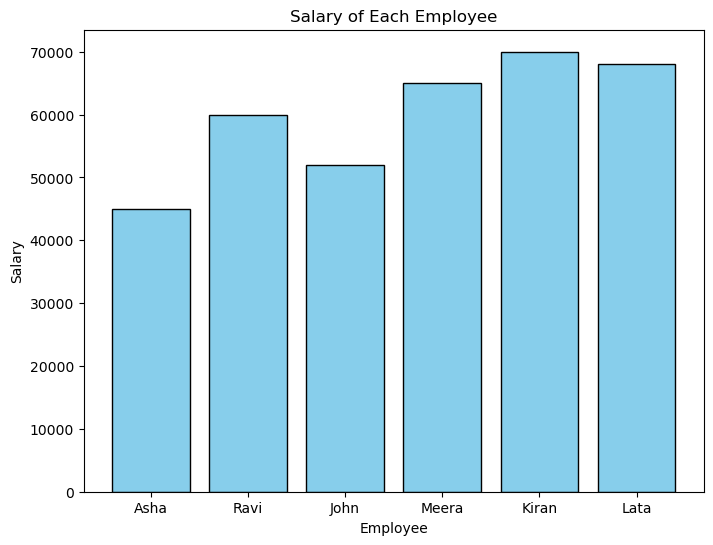

In [13]:
# Salary of each employee (bar chart)
plt.figure(figsize=(8,6))
plt.bar(hr["Employee"], hr["Salary"], color="skyblue", edgecolor="black")
plt.xlabel("Employee")
plt.ylabel("Salary")
plt.title("Salary of Each Employee")
plt.show()





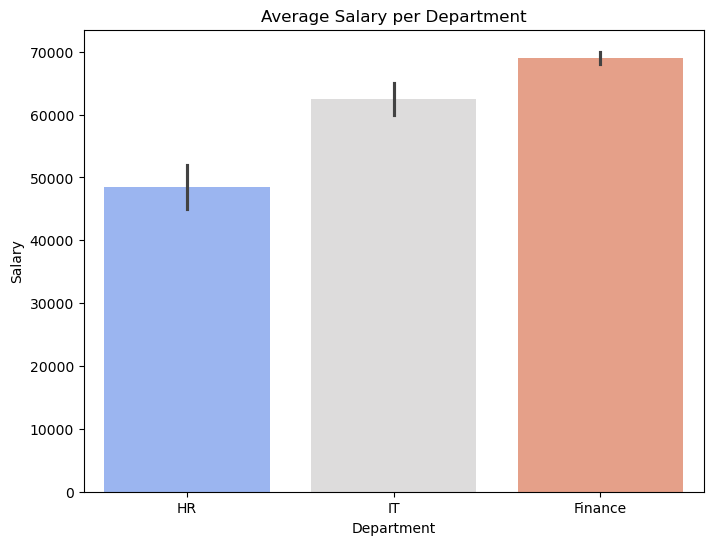

In [14]:
# Average salary per department (bar graph)
plt.figure(figsize=(8,6))
sns.barplot(data=hr, x="Department", y="Salary", estimator="mean", hue="Department", palette="coolwarm", legend=False)
plt.title("Average Salary per Department")
plt.show()



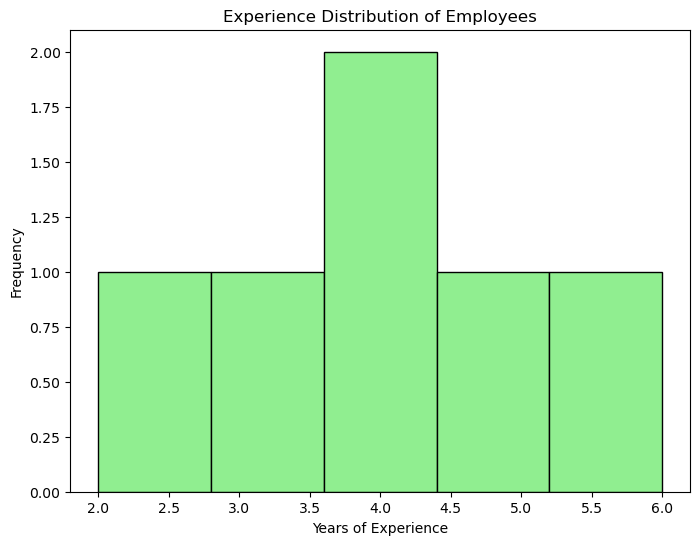

In [15]:
# Experience Deperment
plt.figure(figsize=(8,6))
plt.hist(hr["Experience"], bins=5, color="lightgreen", edgecolor="black")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")
plt.title("Experience Distribution of Employees")
plt.show()

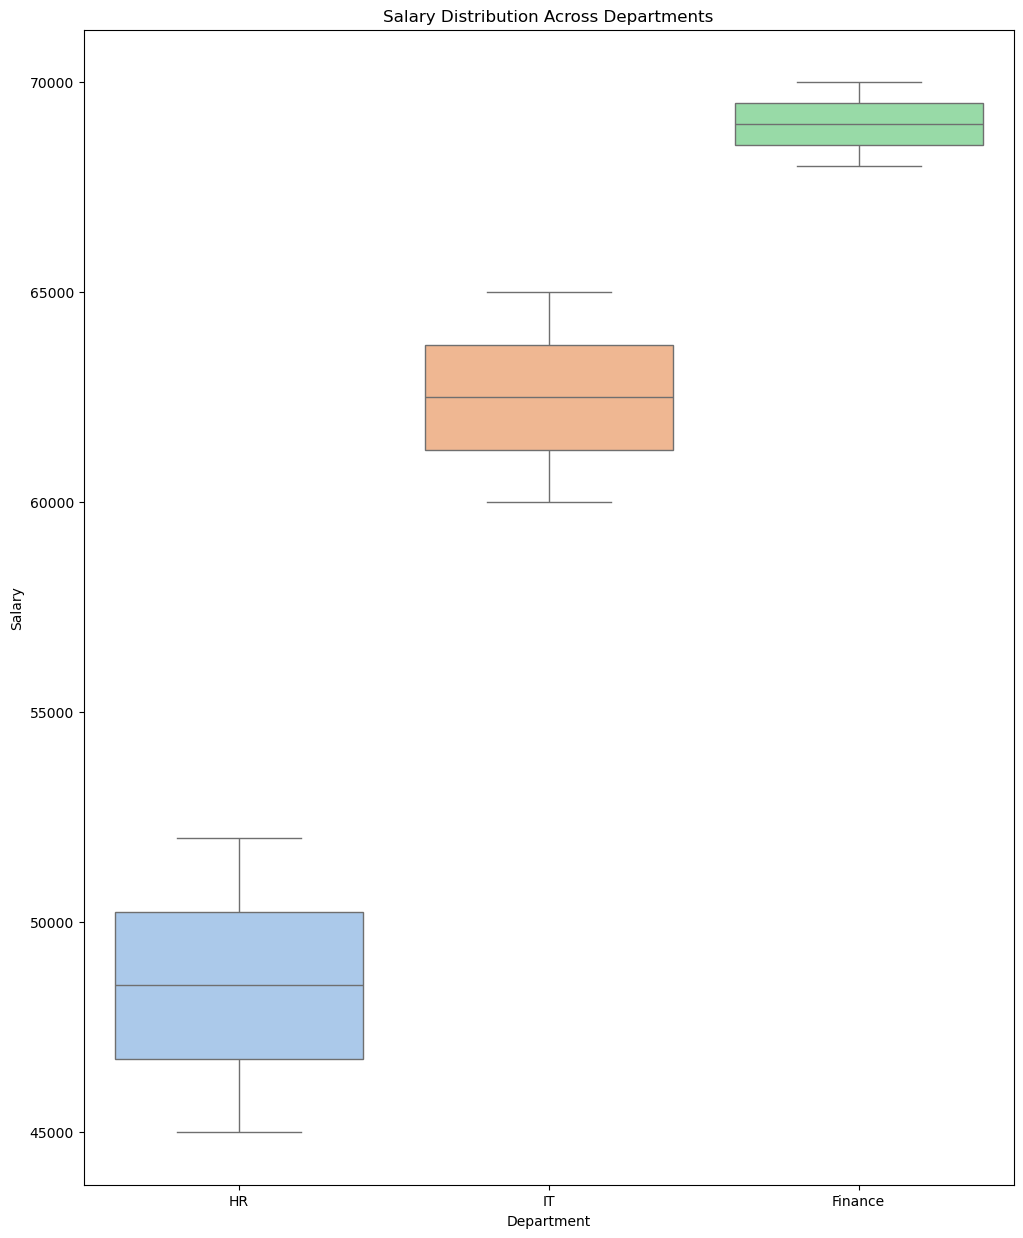

In [18]:
#salary distribution department 
plt.figure(figsize=(12,15))
sns.boxplot(data=hr, x="Department", y="Salary", hue="Department", palette="pastel", legend=False)
plt.title("Salary Distribution Across Departments")
plt.show()

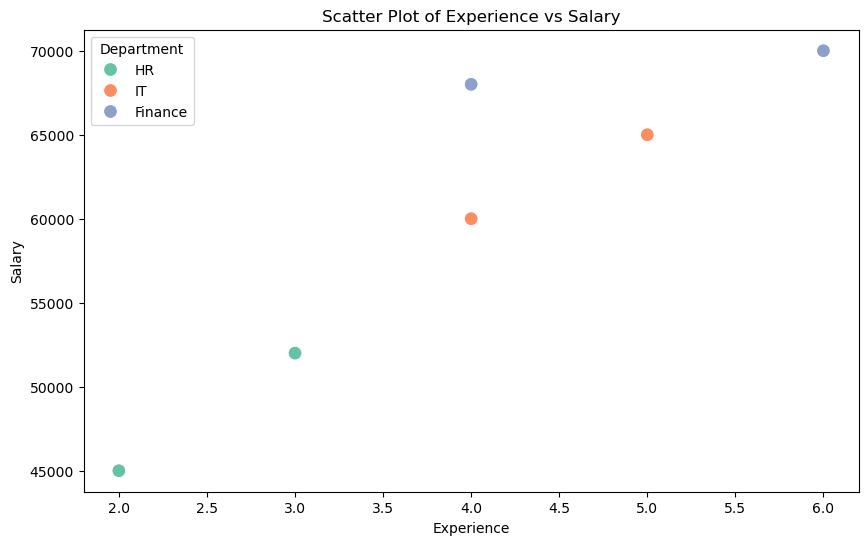

In [19]:
# Exripence vs salary
plt.figure(figsize=(10,6))
sns.scatterplot(data=hr, x="Experience", y="Salary", hue="Department", s=100, palette="Set2")
plt.title("Scatter Plot of Experience vs Salary")
plt.show()

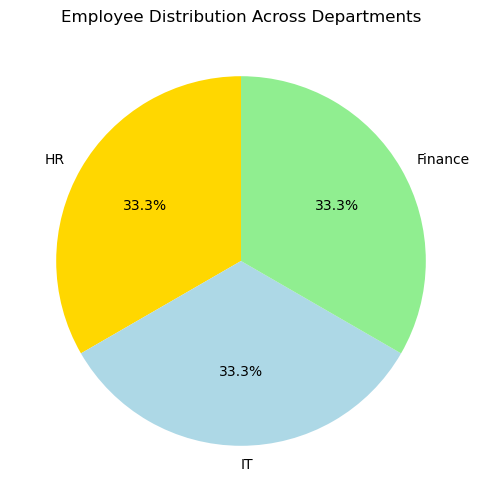

In [20]:
# "Employee Distribution Across Departments
dept_counts = hr["Department"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(dept_counts, labels=dept_counts.index, autopct="%1.1f%%", startangle=90, colors=["gold","lightblue","lightgreen"])
plt.title("Employee Distribution Across Departments")
plt.show()

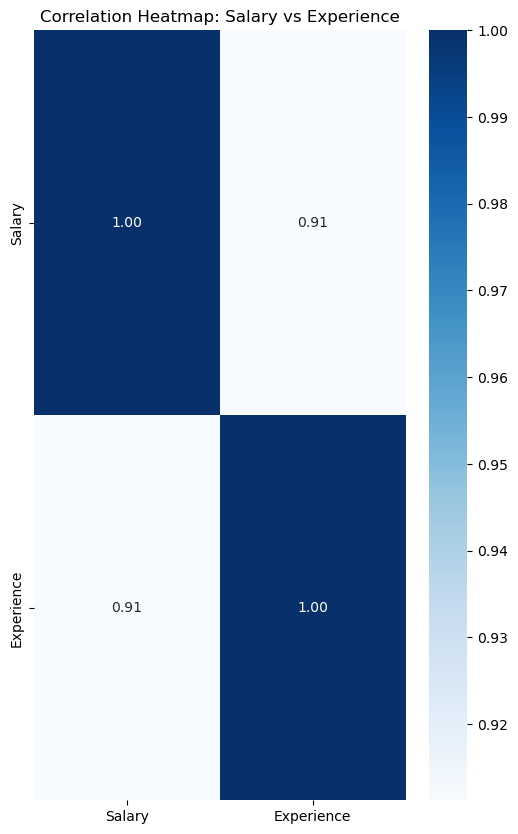

In [23]:
#Correlation Heatmap: Salary vs Experience
plt.figure(figsize=(6,10))
corr = hr[["Salary","Experience"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap: Salary vs Experience")
plt.show()

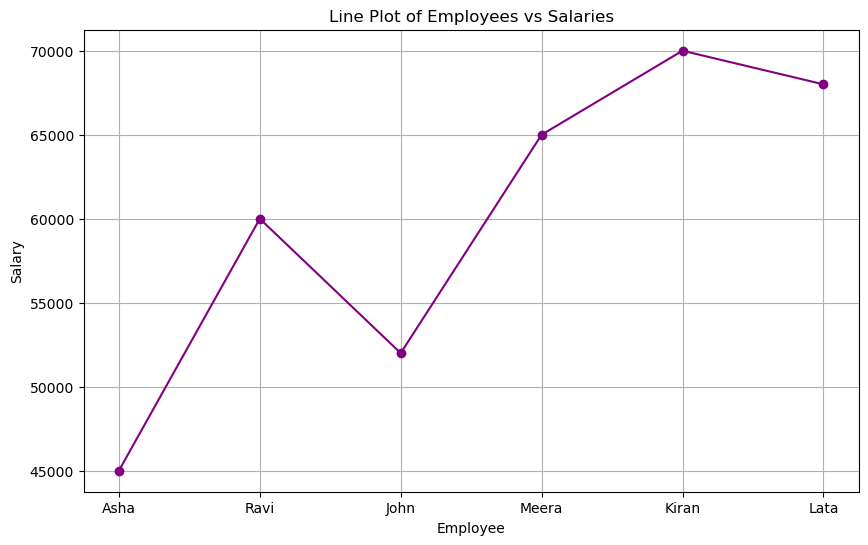

In [28]:
#Line Plot of Employees vs Salaries
plt.figure(figsize=(10,6))
plt.plot(hr["Employee"], hr["Salary"], marker="o", linestyle="-", color="purple")
plt.xlabel("Employee")
plt.ylabel("Salary")
plt.title("Line Plot of Employees vs Salaries")
plt.grid(True)
plt.show()

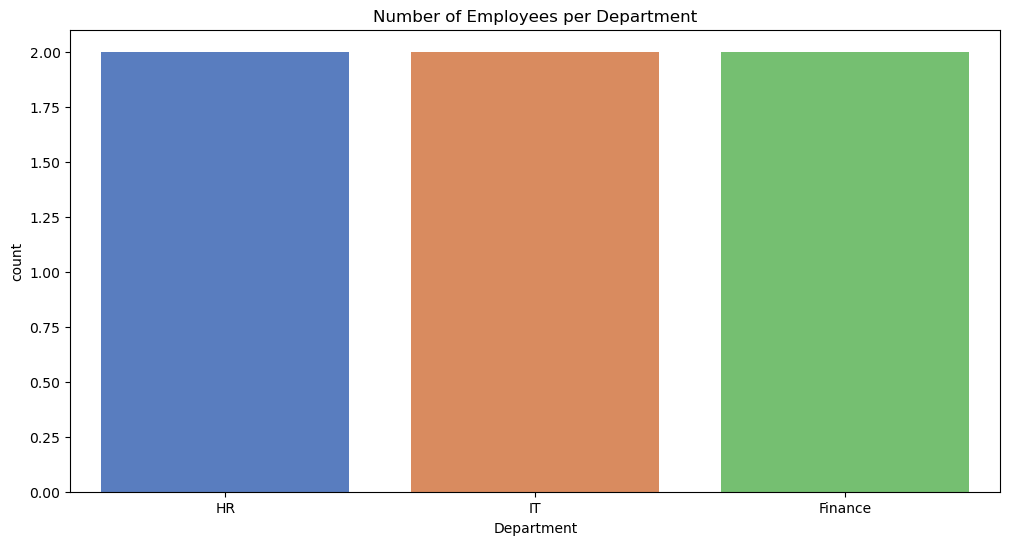

In [29]:
# Number of Employees per Department
plt.figure(figsize=(12,6))
sns.countplot(data=hr, x="Department", hue="Department", palette="muted", legend=False)
plt.title("Number of Employees per Department")
plt.show()

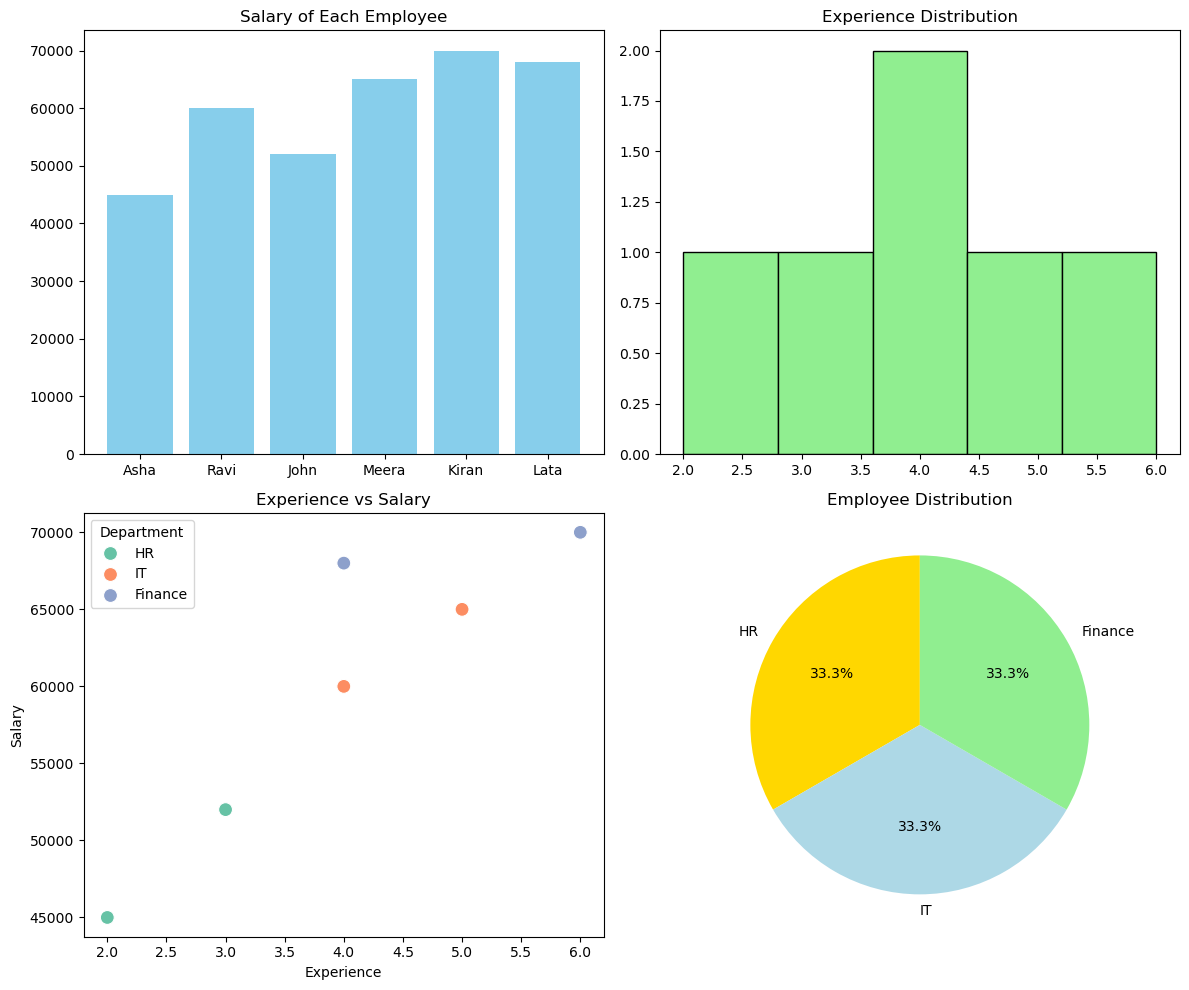

In [30]:
# Across combination Hr employee analysis
fig, axes = plt.subplots(2, 2, figsize=(12,10))

# Bar chart of salaries
axes[0,0].bar(hr["Employee"], hr["Salary"], color="skyblue")
axes[0,0].set_title("Salary of Each Employee")

# Histogram of experience
axes[0,1].hist(hr["Experience"], bins=5, color="lightgreen", edgecolor="black")
axes[0,1].set_title("Experience Distribution")

# Scatter plot
sns.scatterplot(data=hr, x="Experience", y="Salary", hue="Department", s=100, palette="Set2", ax=axes[1,0])
axes[1,0].set_title("Experience vs Salary")

# Pie chart
dept_counts = hr["Department"].value_counts()
axes[1,1].pie(dept_counts, labels=dept_counts.index, autopct="%1.1f%%", startangle=90, colors=["gold","lightblue","lightgreen"])
axes[1,1].set_title("Employee Distribution")

plt.tight_layout()
plt.show()

# Final Conclusion
# The HR dataset demonstrates that Finance leads in both salary and experience, IT maintains a strong balance, while HR has relatively lower salaries and experience levels. Visualizations confirm that experience is a key driver of salary growth, and departments with more experienced employees tend to have higher pay scales.
# This analysis provides a solid foundation for HR decision-making, such as salary benchmarking, workforce planning, and identifying areas where employee development could improve overall compensation balance.
